In [1]:
from PIL import Image, ImageDraw

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
text = "<span style=''>This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your amusement!</span>"
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

In [3]:
toyplot.text.dump(layout, style=True)

toyplot.text.Layout 165.4032x76.8
  toyplot.text.LineBox 129.792x19.2
    toyplot.text.TextBox 'This is ' {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'line-height': 19.2} 50.672x19.2
    toyplot.text.TextBox 'italic' {'font-size': 16.0, 'vertical-align': 'baseline', 'font-style': 'italic', 'font-family': 'helvetica', 'line-height': 19.2} 32.0x19.2
    toyplot.text.TextBox ', ' {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'line-height': 19.2} 8.896x19.2
    toyplot.text.TextBox 'bold' {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'font-weight': 'bold', 'line-height': 19.2} 33.776x19.2
    toyplot.text.TextBox ',' {'font-size': 16.0, 'font-family': 'helvetica', 'vertical-align': 'baseline', 'line-height': 19.2} 4.448x19.2
  toyplot.text.LineBox 129.6064x19.2
    toyplot.text.TextBox 'monospace' {'vertical-align': 'baseline', 'font-size': 16.0, 'font-family': 'monospace', 'line-height': 19.2

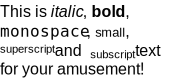

In [8]:
def draw(box, image):
#    if isinstance(box, toyplot.text.LineBox):
#        xml.SubElement(
#            image,
#            "rect",
#            x=str(box.left),
#            y=str(box.top),
#            width=str(box.width),
#            height=str(box.height),
#            fill="ivory",
#            stroke="lightgray",
#        )
        
    if isinstance(box, toyplot.text.TextBox):
        xml.SubElement(
            image,
            "rect",
            x=str(box.left),
            y=str(box.top),
            width=str(box.width),
            height=str(box.height),
            fill="none",
#            stroke="lightgray",
        )
        
        baseline_offset = box.baseline
        
#        xml.SubElement(
#            image,
#            "line",
#            x1=str(box.left),
#            y1=str(box.bottom - baseline_offset),
#            x2=str(box.right),
#            y2=str(box.bottom - baseline_offset),
#            stroke="gray")
        
        style = toyplot.style.combine(
            box.style,
            {"white-space":"pre"},
        )
        
        xml.SubElement(
            image,
            "text",
            x=str(box.left),
            y=str(box.bottom - baseline_offset),
            fill="black",
            stroke="none",
            style=toyplot.style.to_css(style),
        ).text = box.text
        
    for child in box.children:
        draw(child, image)

image = xml.Element(
    "svg",
    width=str(int(layout.width+5)),
    height=str(int(layout.height+5)),
    style="border: 1px solid #f0f0f0",
)
draw(layout, image)
IPython.display.SVG(xml.tostring(image))

In [5]:
IPython.display.HTML("<span style='font-family: helvetica; font-size: 16px'>%s</span>" % text)